# Lettura Icone da Display

Il progetto vuole raggiungere lo scopo di catturare l'immagine di un display e identificare lo stato delle icone che ne compongono l'interfaccia.

## Come?

### Cattura 

Ottenere una immagine di modo che possa essere usata per la creazione e la ricerca delle immagini template che rappresentano le icone.

### Creazione Templates

Creare le immagini template delle icone

### Matching

Fare il matching delle immagini template sull'immagine ottenuta

In [1]:
# importo le librerie che mi serviranno durante il progetto
import numpy as np
import argparse
import imutils
import glob
import cv2
import matplotlib.pyplot as plt

### Osservazione

cv2 è il modulo della libreria OpenCV. [inserire link]
numpy e matplotlib sono due moduli molto utilizzati nelle datascience perché mettono a disposizione molte funzioni utili per analizzare e modificare una grande varietà di dati. [inserire link]
argparse verrà utilizzato nella gestione degli input. [inserire link]
glob verrà utilizzato per gestire i percorsi dei dati di interesse. [inserire link]
imutils è un modulo che contiene diversi strumenti per manipolare le immagini. [inserire link]

<function matplotlib.pyplot.show(close=None, block=None)>

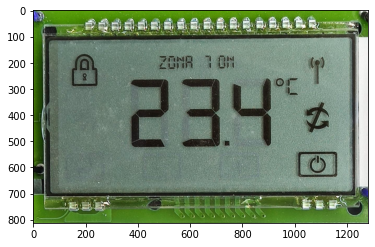

In [2]:
# lettura immagine da file

image = cv2.imread('images/pcb.jpg')

plt.imshow(image)
plt.show

# cv2.imshow('image', image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Osservazioni

Usando la funzione "imread" di openCV posso caricare una immagine da un file. [inserire link alla reference]
Nel caso in cui volessi catturare il frame da una videocamera, posso utilizzare la funzione "VideoCapture". [inserire link alla reference]

### Nota
Per mostrare l'immagine ho usato la funzione "imshow" di "matplotlib.pyplot" invece di quella di openCV perché ritengo sia più comprensibile inserirla nella struttura del notebook piuttosto che creare una finestra esterna.

<function matplotlib.pyplot.show(close=None, block=None)>

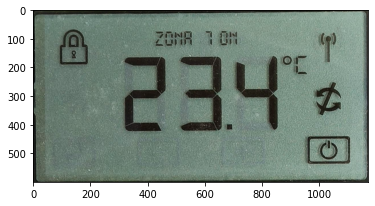

In [113]:
cropped_img = image[100:700, 55:1225]

plt.imshow(cropped_img)
plt.show

# cv2.imshow('cropped_img', cropped_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

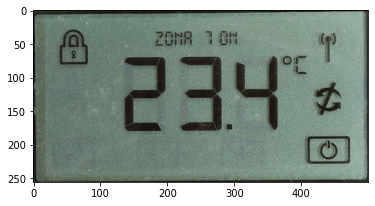

In [114]:
resized_img = imutils.resize(cropped_img,width=500)

plt.imshow(resized_img)
plt.show

# cv2.imshow('resized_img', resized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

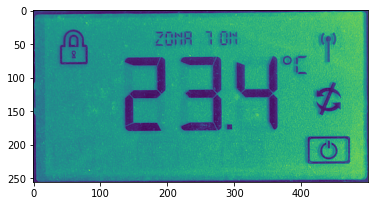

In [115]:
gray = cv2.cvtColor(resized_img,cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.show

# cv2.imshow('gray', gray)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

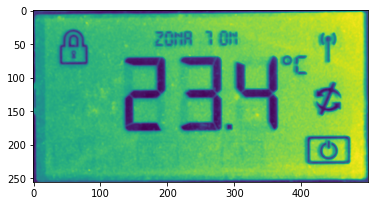

In [116]:
blurred = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(blurred)
plt.show

# cv2.imshow('blurred', blurred)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

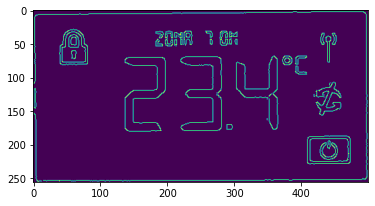

In [117]:
edged = cv2.Canny(blurred, 50, 150, 255)

plt.imshow(edged)
plt.show

# cv2.imshow('edged', edged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

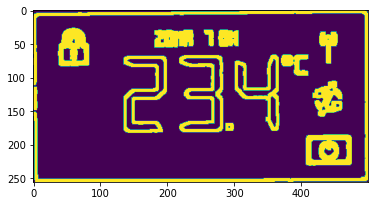

In [141]:
kernel = np.ones((5,5), np.uint8)
dilation = cv2.dilate(edged.copy(), kernel, iterations=1)

plt.imshow(dilation)
plt.show

# cv2.imshow('draw_cnts', draw_cnts)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

<function matplotlib.pyplot.show(close=None, block=None)>

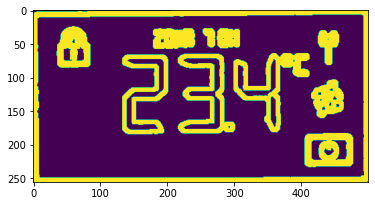

In [142]:
draw_cnts = dilation.copy()

contours, hierarchy = cv2.findContours(draw_cnts, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
i = 0

for c in contours:
    cv2.drawContours(draw_cnts, contours, i, (255,0,0), thickness=3)
    # print("colorato contorno n", i)
    i += 1

plt.imshow(draw_cnts)
plt.show

# cv2.imshow('draw_cnts', draw_cnts)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


<function matplotlib.pyplot.show(close=None, block=None)>

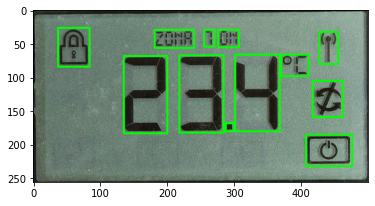

In [143]:
img_with_icons = resized_img.copy()

icons = []
icons_bounds = []

for c in contours:
    (x,y,w,h) = cv2.boundingRect(c)

    if (5 < x < 495) and (5 < y < 245) :
        if (w > 8) and (h > 7):
            if h < 200:
                cv2.rectangle(img_with_icons,(x,y),(x+w,y+h),(0,255,0),2)
                bound = (x,y,w,h)
                icons.append(c)
                icons_bounds.append(bound)


plt.imshow(img_with_icons)
plt.show

# cv2.imshow('draw_cnts', draw_cnts)
# cv2.waitKey(0)
# cv2.destroyAllWindows()